## Importamos inicialmente las librerias y modulos que vamos a utilizar, luego importamos otras mas.

In [1]:
import urllib.request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import numpy as np

In [2]:
# PARA BAJAR AUTOMATICAMENTE EL DATASET PARA SER USADO
file_name = 'dataR2.csv'
def download_file(file_name):
    print('Descargando el dataset')
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv'
    urllib.request.urlretrieve(url, file_name)
download_file(file_name)

Descargando el dataset


In [3]:
# Cargamos los datos y los dividimos en conjuntos para entrenar y testear.
data = pd.read_csv(file_name)
y = data["Classification"]
X = data.drop(["Classification"], axis=1)
(X_train, X_test,
 y_train, y_test) = train_test_split(X,
                                     y,
                                     stratify=y,
                                     test_size=0.33,
                                     random_state=11)

## Como se componen los datos

#### El dataset se compone de 10 columnas. 9 corresponden a variables independientes,
#### que usaremos para predecir el target y 1 (Classification) es la variable a predecir. Todas las variables son numéricas, ya 
#### sea enteras o reales y no tiene valores nulos

In [4]:
data.head(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [5]:
data.sample(5) # Otra forma de ver valores

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
71,44,24.740000,106,58.460,15.285341,18.1600,16.10000,5.31000,244.750,2
5,49,22.854458,92,3.226,0.732087,6.8317,13.67975,10.31760,530.410,1
19,32,36.512637,87,14.026,3.009980,49.3727,5.10000,17.10223,588.460,1
16,47,22.030000,84,2.869,0.590000,26.6500,38.04000,3.32000,191.720,1
94,60,31.231410,131,30.130,9.736007,37.8430,8.40443,11.50005,396.021,2


## ARBOL DE DECISION

In [6]:
# Primero creamos un arbol de decisión para ver la precisión y poder compararla
tree = DecisionTreeClassifier(max_depth=2, random_state=11) # Max depth acorta el arbol si no salia muy grande.
tree.fit(X_train, y_train)
print(f"La precisión del Arbol de decisión es de: {tree.score(X_test, y_test)}")

La precisión del Arbol de decisión es de: 0.6410256410256411


In [7]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=11)

In [8]:
from sklearn.tree import plot_tree # Importamos para graficar el arbol de decisión.
import matplotlib.pyplot as plt # Para manejar el tamaño del grafico del arbol.

### A) Visualizando el modelo

<Figure size 1440x720 with 0 Axes>

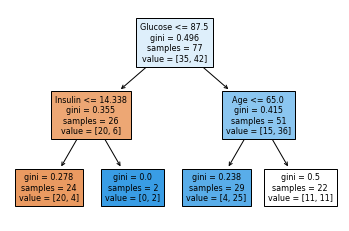

<Figure size 1440x720 with 0 Axes>

In [9]:
plot_tree(decision_tree=tree, feature_names=X_train.columns, filled=True, fontsize=8); # Feature=nombre de columnas, Filled=Para colorear el arbol, el punto y coma al final es para que no salga todo el texto del arbol de decision y solo el grafico
plt.figure(figsize=(20,10))

### B) Calculando predicciones

In [10]:
a = data.sample() # Tomamos un valor aleatorio para predecir y ver como se comporta un arbol de decisión.
a

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
69,44,19.56,114,15.89,4.468268,13.08,20.37,4.62,220.66,2


In [19]:
# Por ejemplo defino la variable segun los valores de la fila 39.
dato1 = 64, 34.529723, 95, 4.427, 1.037394, 21.2117, 5.46262, 6.70188, 252.449
prediction = tree.predict_proba([dato1])
print (prediction)

[[0.13793103 0.86206897]]


c:\users\nestor\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [20]:
# Esta matriz de arriba quiere decir que para los valores de la fila 18, hay un 13.79% de no cumplir con la predicción y hay 
# un 86.20% de probabilidades de exito.

In [21]:
# Otro ejemplo con la fila 113.
dato1 = 65, 32.05, 97, 5.73, 1.370998, 61.48, 22.54, 10.33, 314.05
prediction = tree.predict_proba([dato1])
print (prediction)

[[0.13793103 0.86206897]]


c:\users\nestor\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [22]:
# 13.79% de que sea un "NO", y probabilidad del 86,20% de que sea un "SI"

### C) Interpretando el modelo

In [23]:
import seaborn as sns

### La variable "Glucose" es la mas importante, se puede ver en el grafico de abajo que hay una división cerca de los "90" entre los que encuadran en la "Classification" 1 y 2

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

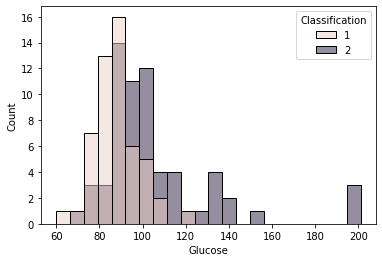

In [24]:
sns.histplot(x=data.Glucose, hue=data.Classification)

<AxesSubplot:xlabel='Age', ylabel='Count'>

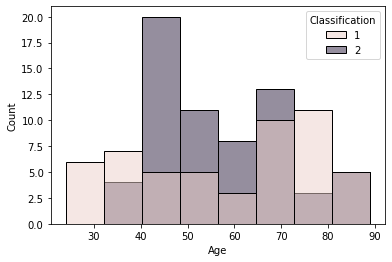

In [17]:
sns.histplot(x=data.Age, hue=data.Classification)

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

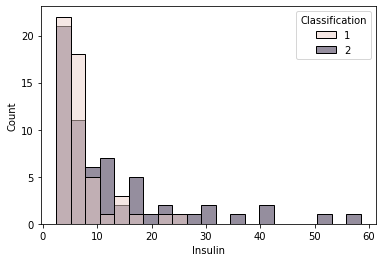

In [25]:
sns.histplot(x=data.Insulin, hue=data.Classification)